In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("bmh")

In [57]:
nt = 1000 # time steps
nx = 101 # 100 x steps

nu = 0.1 # viscosity
nu = (0.01/np.pi) # low viscosity cannot predict

dt = .001 # delta time
#dx = abs(x[0] - x[1])
dx = 2/(nx-1) 

x = np.linspace(-1, 1, nx) # spatial domain

In [58]:
u = np.zeros(nx) # current
un = np.zeros(nx) # past
uf = np.zeros((nt, nx)) 

In [59]:
# initial & boundary conditions
u = np.sin(np.pi * x)
uf[0,:] = u # initial condition
# boundary cond = 0 not computed

In [60]:
# convective term -> backward in space, diffusive term -> central in space
for n in range (1, nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * (dt/dx) *(un[i] - un[i-1]) + (nu * dt / (dx**2)) * (un[i+1]-2*un[i]+un[i-1])
        uf[n,i] = u[i]

/tmp/ipykernel_2005/499388223.py:5: RuntimeWarning: overflow encountered in scalar multiply
  u[i] = un[i] - un[i] * (dt/dx) *(un[i] - un[i-1]) + (nu * dt / (dx**2)) * (un[i+1]-2*un[i]+un[i-1])
/tmp/ipykernel_2005/499388223.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  u[i] = un[i] - un[i] * (dt/dx) *(un[i] - un[i-1]) + (nu * dt / (dx**2)) * (un[i+1]-2*un[i]+un[i-1])
/tmp/ipykernel_2005/499388223.py:5: RuntimeWarning: invalid value encountered in scalar add
  u[i] = un[i] - un[i] * (dt/dx) *(un[i] - un[i-1]) + (nu * dt / (dx**2)) * (un[i+1]-2*un[i]+un[i-1])


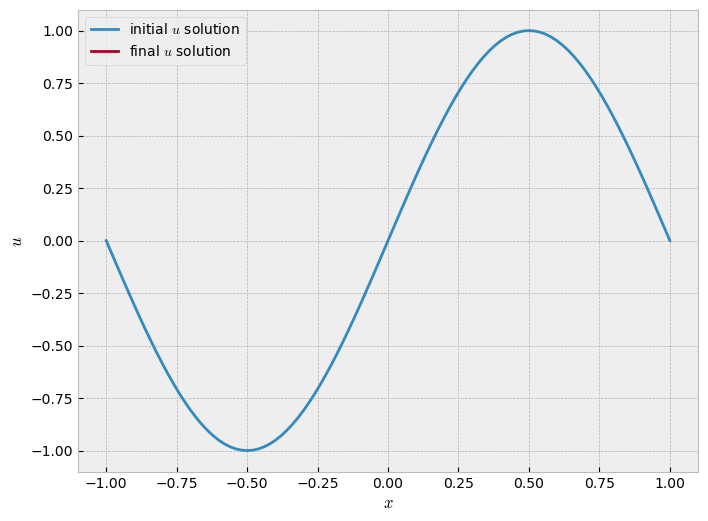

In [61]:
plt.figure(figsize=(8, 6))
plt.plot(x, uf[0,:], label=r"initial $u$ solution")
plt.plot(x, uf[-1,:], label=r"final $u$ solution")
plt.xlabel("$x$")
plt.ylabel("$u$")
plt.legend()

<Axes: >

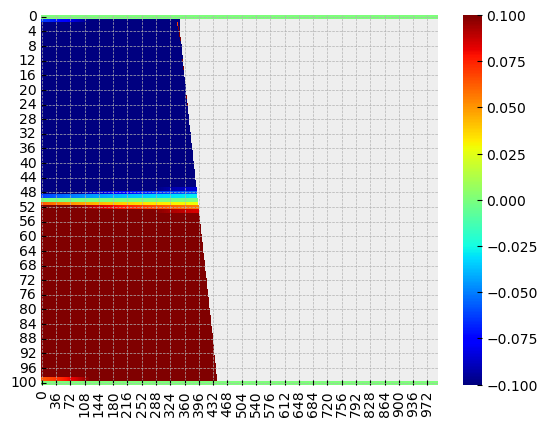

In [62]:
sns.heatmap(uf.T, cmap="jet")